In [1]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


Real_Estate_data_df = pd.read_csv('USA Real Estate Dataset new.csv')

Real_Estate_data_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,33968.0,for_sale,99000.0,1.0,1.0,5.0,49388.0,Terlingua,Texas,79852,600.0,NaN
1,88188.0,for_sale,58800.0,NaN,NaN,1.0,841041.0,Orange,Texas,77632,NaN,NaN
2,88188.0,for_sale,58800.0,NaN,NaN,1.0,844563.0,Orange,Texas,77632,NaN,NaN
3,88188.0,for_sale,58800.0,NaN,NaN,1.0,845421.0,Orange,Texas,77632,NaN,NaN
4,88188.0,for_sale,58800.0,NaN,NaN,1.0,859147.0,Orange,Texas,77632,NaN,NaN


In [101]:
Real_Estate_data_df.shape

(40111, 12)

In [43]:
Real_Estate_data_df.info()
nan_values = Real_Estate_data_df.isna().sum()
print("NaN: ", nan_values)

duplicated_values = Real_Estate_data_df.duplicated().sum()
print("duplicated: ", duplicated_values)

<class 'pandas.core.frame.DataFrame'>
Index: 40053 entries, 0 to 40110
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   brokered_by                      40035 non-null  float64
 1   status                           40053 non-null  object 
 2   price                            40053 non-null  float64
 3   bed                              28703 non-null  float64
 4   bath                             27158 non-null  float64
 5   acre_lot                         36224 non-null  float64
 6   street                           39946 non-null  float64
 7   zip_code                         40053 non-null  int64  
 8   house_size                       28845 non-null  float64
 9   prev_sold_date                   15315 non-null  object 
 10  bed_bath_ratio                   27102 non-null  float64
 11  bedrooms_times_bathrooms         27102 non-null  float64
 12  log_price              

In [44]:
Real_Estate_data_df.dropna(inplace=True)
Real_Estate_data_df.sample(15)

,brokered_by,status,price,bed,bath,acre_lot,street,zip_code,house_size,prev_sold_date,bed_bath_ratio,bedrooms_times_bathrooms,log_price,house_size_category_medium,house_size_category_large,house_size_category_extra_large,acre_lot_scaled,house_size_scaled,is_fort_worth,is_texas
9498,15807.0,for_sale,275000.0,3.0,2.0,0.16,778760.0,75052,1795.0,2013-07-22,1.000000,6.0,12.524530,True,False,False,-0.107721,-0.375534,0.0,1.0
22118,58063.0,for_sale,239900.0,4.0,2.0,1.00,1209406.0,75455,1736.0,2022-03-22,1.333333,8.0,12.387982,True,False,False,-0.099832,-0.418265,0.0,1.0
4618,52739.0,for_sale,509900.0,3.0,3.0,1.13,167099.0,76008,2497.0,2007-04-17,0.750000,9.0,13.141972,False,True,False,-0.098611,0.132898,0.0,1.0
34614,53525.0,for_sale,364000.0,3.0,2.0,0.15,831938.0,76227,1791.0,2019-05-08,1.000000,6.0,12.804912,True,False,False,-0.107815,-0.378431,0.0,1.0
19638,13676.0,for_sale,599000.0,4.0,3.0,0.22,1534359.0,75248,2144.0,1985-07-15,1.000000,12.0,13.303019,False,True,False,-0.107158,-0.122766,0.0,1.0
11356,53157.0,for_sale,479900.0,4.0,3.0,0.15,1688944.0,75092,3012.0,2016-02-12,1.000000,12.0,13.081335,False,False,True,-0.107815,0.505894,0.0,1.0
8966,103237.0,for_sale,320000.0,4.0,3.0,0.21,1458574.0,75041,2550.0,2011-03-01,1.000000,12.0,12.676079,False,True,False,-0.107251,0.171284,0.0,1.0
19358,47071.0,for_sale,399500.0,3.0,2.0,0.31,1108862.0,76001,2063.0,2019-11-18,1.000000,6.0,12.897972,False,True,False,-0.106312,-0.181431,0.0,1.0
5255,55565.0,for_sale,719000.0,5.0,3.0,0.15,1435422.0,76114,3224.0,2018-07-23,1.250000,15.0,13.485618,False,False,True,-0.107815,0.659437,0.0,1.0
16434,31152.0,for_sale,475000.0,3.0,2.0,1.50,51683.0,75142,2119.0,2016-12-01,1.000000,6.0,13.071072,False,True,False,-0.095137,-0.140873,0.0,1.0


In [46]:
#Checking the number of datapoints after cleaning
print(Real_Estate_data_df.shape)

(13363, 20)


In [6]:
# Display the basic information of the dataframe
print(Real_Estate_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40111 entries, 0 to 40110
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brokered_by     40093 non-null  float64
 1   status          40111 non-null  object 
 2   price           40053 non-null  float64
 3   bed             28761 non-null  float64
 4   bath            27158 non-null  float64
 5   acre_lot        36224 non-null  float64
 6   street          40004 non-null  float64
 7   city            40094 non-null  object 
 8   state           40111 non-null  object 
 9   zip_code        40111 non-null  int64  
 10  house_size      28903 non-null  float64
 11  prev_sold_date  15315 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 3.7+ MB
None


In [47]:
#zip code should be in type of string or integer
#I found string will be better because the infomation it contains a area.
Real_Estate_data_df['zip_code'] = Real_Estate_data_df['zip_code'].astype(str)

In [48]:
# summary statistics
print(Real_Estate_data_df.describe())

         brokered_by         price           bed          bath      acre_lot  \
count   13363.000000  1.336300e+04  13363.000000  13363.000000  13363.000000   
mean    52556.649031  5.303158e+05      3.489636      2.701714      1.689866   
std     29695.501081  7.348514e+05      0.951107      1.164736     22.567301   
min        51.000000  2.950000e+04      1.000000      1.000000      0.010000   
25%     26871.000000  2.850000e+05      3.000000      2.000000      0.160000   
50%     52823.000000  3.850000e+05      3.000000      2.000000      0.210000   
75%     73823.000000  5.500000e+05      4.000000      3.000000      0.400000   
max    110142.000000  2.450000e+07     41.000000     21.000000   2366.000000   

             street    house_size  bed_bath_ratio  bedrooms_times_bathrooms  \
count  1.336300e+04  13363.000000    13363.000000              13363.000000   
mean   9.515718e+05   2336.388311        0.975325                 10.149667   
std    5.341501e+05   1223.480084        0

In [49]:

Real_Estate_data_df.dtypes

brokered_by                        float64
status                              object
price                              float64
bed                                float64
bath                               float64
acre_lot                           float64
street                             float64
zip_code                            object
house_size                         float64
prev_sold_date                      object
bed_bath_ratio                     float64
bedrooms_times_bathrooms           float64
log_price                          float64
house_size_category_medium            bool
house_size_category_large             bool
house_size_category_extra_large       bool
acre_lot_scaled                    float64
house_size_scaled                  float64
is_fort_worth                      float64
is_texas                           float64
dtype: object

In [50]:
# Check the value counts
print(Real_Estate_data_df['status'].value_counts())

status
for_sale    13363
Name: count, dtype: int64


In [51]:
# checking for missing values
print(Real_Estate_data_df.isnull().sum())

brokered_by                        0
status                             0
price                              0
bed                                0
bath                               0
acre_lot                           0
street                             0
zip_code                           0
house_size                         0
prev_sold_date                     0
bed_bath_ratio                     0
bedrooms_times_bathrooms           0
log_price                          0
house_size_category_medium         0
house_size_category_large          0
house_size_category_extra_large    0
acre_lot_scaled                    0
house_size_scaled                  0
is_fort_worth                      0
is_texas                           0
dtype: int64


In [52]:
# Checking for duplicates
print(Real_Estate_data_df.duplicated().sum())

0


In [53]:
columns_to_drop_na = ['bed', 'bath', 'house_size', 'prev_sold_date']  # Specify the columns where you want to drop NA values
Clean_Real_Estate_data_df = Real_Estate_data_df.dropna(subset=columns_to_drop_na)
# Display the cleaned DataFrame
print(Clean_Real_Estate_data_df.head())

    brokered_by    status     price  bed  bath  acre_lot     street zip_code  \
18      22959.0  for_sale  349000.0  6.0   5.0      4.41   307395.0    75966   
19     106174.0  for_sale  249500.0  2.0   2.0      1.19   363547.0    75948   
23       4317.0  for_sale  479000.0  5.0   4.0      6.28   840246.0    75966   
27     100789.0  for_sale  179900.0  3.0   2.0      2.23   439804.0    75932   
28      30107.0  for_sale  134900.0  4.0   2.0      0.29  1463813.0    75966   

    house_size prev_sold_date  bed_bath_ratio  bedrooms_times_bathrooms  \
18      5888.0     2014-06-17        1.000000                      30.0   
19      1872.0     2022-04-28        0.666667                       4.0   
23      4248.0     2022-05-06        1.000000                      20.0   
27      1240.0     2022-01-28        1.000000                       6.0   
28      2010.0     2021-07-29        1.333333                       8.0   

    log_price  house_size_category_medium  house_size_category_large

In [54]:
#House size

Real_Estate_data_df['house_size'].unique()

array([5888., 1872., 4248., ..., 1069., 3482.,  899.])

In [55]:
# Step 2: Data Cleaning
# Drop rows with missing target ('price') values
Real_Estate_data_df = Real_Estate_data_df.dropna(subset=['price'])


In [130]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
import matplotlib.pyplot as plt

In [131]:
# Convert 'zip_code' to string for encoding purposes
Real_Estate_data_df['zip_code'] = Real_Estate_data_df['zip_code'].astype(str)

In [132]:

# Ensure the target variable is suitable for classification
# Example: Converting 'status' to a binary classification (e.g., 'for_sale' vs. 'not_for_sale')
Real_Estate_data_df['status_binary'] = (Real_Estate_data_df['status'] == 'for_sale').astype(int)


In [133]:

# Feature Engineering
# Create meaningful interaction terms
Real_Estate_data_df['bed_bath_ratio'] = Real_Estate_data_df['bed'] / (Real_Estate_data_df['bath'] + 1)
Real_Estate_data_df['bedrooms_times_bathrooms'] = Real_Estate_data_df['bed'] * Real_Estate_data_df['bath']
Real_Estate_data_df['price_per_bedroom'] = Real_Estate_data_df['price'] / Real_Estate_data_df['bed']
Real_Estate_data_df['price_per_bathroom'] = Real_Estate_data_df['price'] / Real_Estate_data_df['bath']


In [134]:

# Target Encoding for high-cardinality categorical variables
target_encoder = TargetEncoder()
Real_Estate_data_df['city_encoded'] = target_encoder.fit_transform(Real_Estate_data_df['city'], Real_Estate_data_df['status_binary'])
Real_Estate_data_df['state_encoded'] = target_encoder.fit_transform(Real_Estate_data_df['state'], Real_Estate_data_df['status_binary'])


In [135]:

# Feature Scaling
scaler = StandardScaler()
Real_Estate_data_df[['acre_lot_scaled', 'house_size_scaled']] = scaler.fit_transform(Real_Estate_data_df[['acre_lot', 'house_size']])


In [136]:

# Prepare the data for modeling
X = Real_Estate_data_df.drop(['price', 'status', 'status_binary', 'city', 'state', 'prev_sold_date'], axis=1, errors='ignore')
y = Real_Estate_data_df['status_binary']  # Binary target variable


In [137]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [138]:
# Set up the Decision Tree Classifier model with a pipeline for scaling
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42))
])

In [139]:

# Hyperparameters to tune
param_grid = {
    'dt__max_depth': [None, 10, 20, 30, 40, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
    'dt__criterion': ['gini', 'entropy']
}

In [140]:

# Perform GridSearchCV to find the best hyperparameters
grid_search_dt = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 10, 20, 30, 40, 50],
                         'dt__min_samples_leaf': [1, 2, 4],
                         'dt__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [141]:
# Best parameters and model performance
best_dt_model = grid_search_dt.best_estimator_
print(f"Best Hyperparameters for Decision Tree: {grid_search_dt.best_params_}")
print(f"Best Cross-Validation Accuracy for Decision Tree: {grid_search_dt.best_score_}")


Best Hyperparameters for Decision Tree: {'dt__criterion': 'gini', 'dt__max_depth': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}
Best Cross-Validation Accuracy for Decision Tree: 0.9999376655758143


In [142]:

# Evaluate the Decision Tree model on the test set
y_pred_dt = best_dt_model.predict(X_test)


In [143]:
# Model evaluation metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Accuracy Score:", accuracy_score(y_test, y_pred_dt))


Confusion Matrix:
 [[ 338    0]
 [   0 7685]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
           1       1.00      1.00      1.00      7685

    accuracy                           1.00      8023
   macro avg       1.00      1.00      1.00      8023
weighted avg       1.00      1.00      1.00      8023

Accuracy Score: 1.0


In [144]:
# Evaluate using cross-validation for more robust performance metrics
cv_scores_dt = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy Scores: {cv_scores_dt}")
print(f"Mean Accuracy Score: {cv_scores_dt.mean()}")


Decision Tree Cross-Validation Accuracy Scores: [1.         1.         1.         0.99984416 0.99984416]
Mean Accuracy Score: 0.9999376655758143


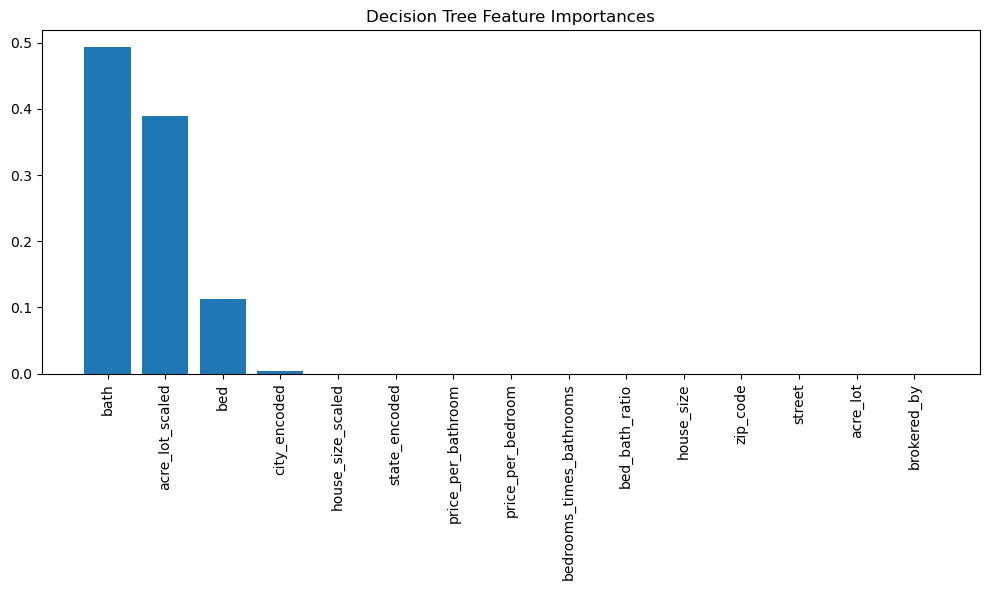

In [145]:
# Plotting feature importance
if hasattr(best_dt_model.named_steps['dt'], 'feature_importances_'):
    plt.figure(figsize=(10, 6))
    feature_importances = best_dt_model.named_steps['dt'].feature_importances_
    sorted_indices = np.argsort(feature_importances)[::-1]
    plt.bar(range(X_train.shape[1]), feature_importances[sorted_indices])
    plt.title('Decision Tree Feature Importances')
    plt.xticks(range(X_train.shape[1]), X.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()

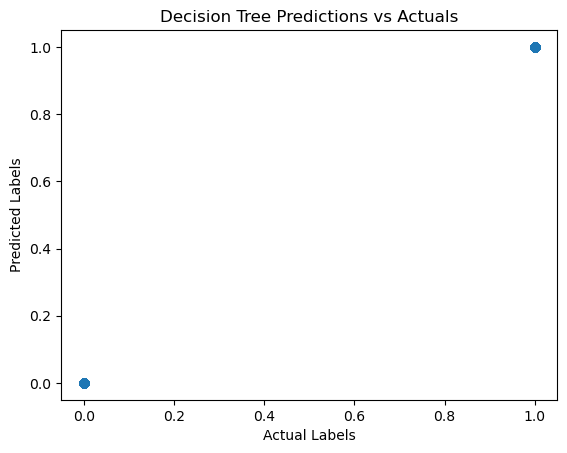

In [146]:

# Optional: Plotting predictions vs actuals for binary classification
plt.scatter(y_test, y_pred_dt, alpha=0.5)
plt.title('Decision Tree Predictions vs Actuals')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()

In [114]:
# Prepare the data for modeling
X = Real_Estate_data_df.drop(['price', 'city', 'state', 'prev_sold_date'], axis=1, errors='ignore')
y = Real_Estate_data_df['price']


In [115]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [118]:
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=42))
])


In [120]:
# Hyperparameters to tune
param_grid = {
    'dt__max_depth': [None, 10, 20, 30, 40, 50],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4]
}

In [121]:
# Perform GridSearchCV to find the best hyperparameters
grid_search_dt = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)


ValueError: 
All the 270 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
270 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_data.py", line 876, in fit
    return self.partial_fit(X, y, sample_weight)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\preprocessing\_data.py", line 912, in partial_fit
    X = self._validate_data(
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\base.py", line 633, in _validate_data
    out = check_array(X, input_name="X", **check_params)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py", line 997, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\sklearn\utils\_array_api.py", line 521, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "c:\Users\Nat\anaconda3\envs\dev\lib\site-packages\pandas\core\generic.py", line 2150, in __array__
    arr = np.asarray(values, dtype=dtype)
ValueError: could not convert string to float: 'for_sale'


#Check correlation between features and price.
Select Relevant Features: Focus on numerical features such as bed, bath, acre_lot, house_size, etc.
Compute Correlation Coefficients: Use Pearson correlation to measure the linear relationship between price and each feature.
Visualize Correlations: Optionally, visualize the correlations using a heatmap for a more intuitive understanding.

In [56]:
# Compute the correlation matrix for numerical features including 'price'
numerical_features = ['price', 'bed', 'bath', 'acre_lot', 'house_size']

In [57]:
# Ensure all required features exist in the dataset
available_features = [feature for feature in numerical_features if feature in Real_Estate_data_df.columns]


In [58]:
# Calculate the correlation matrix
correlation_matrix = Real_Estate_data_df[available_features].corr()


In [79]:
# Display the correlation with 'price'
print("Correlation of features with 'price':")
print(correlation_matrix['price'].sort_values(ascending=False))

Correlation of features with 'price':
price         1.000000
house_size    0.712028
bath          0.597599
bed           0.329894
acre_lot      0.076071
Name: price, dtype: float64


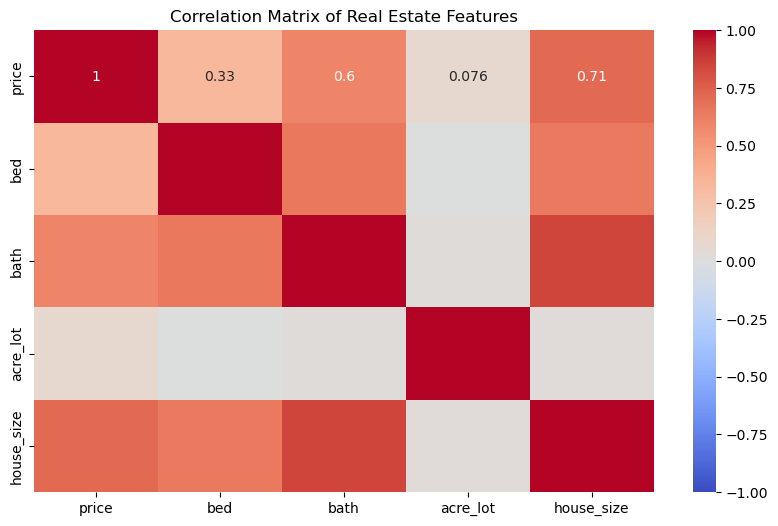

In [80]:
#  Visualize the correlation matrix using a heatmap The more features higher price
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Real Estate Features')
plt.show()

#Feature Techniques

Creating Interaction Features: Generate new features by combining existing ones. For example, bed * bath could capture the effect of having more bathrooms per bedroom.
Log Transformation: Apply log transformation to skewed features like price or house_size to reduce the effect of outliers and normalize the distribution.
Binning: Convert continuous features into categorical features (bins). For example, you can bin house_size into categories like 'small', 'medium', and 'large'.
Feature Scaling: Normalize or standardize features like acre_lot and house_size to ensure all features contribute equally to the model.
Date Features Extraction: If prev_sold_date or similar date features are available, extract useful information like years_since_last_sold.
Geospatial Features: If latitude and longitude data are available, calculate proximity to landmarks or the city center.

In [81]:
# Step 1: Creating Interaction Features
Real_Estate_data_df['bed_bath_ratio'] = Real_Estate_data_df['bed'] / (Real_Estate_data_df['bath'] + 1)  # Adding 1 to avoid division by zero
Real_Estate_data_df['bedrooms_times_bathrooms'] = Real_Estate_data_df['bed'] * Real_Estate_data_df['bath']


In [82]:
# Step 2: Log Transformation to Handle Skewness
Real_Estate_data_df['log_price'] = np.log1p(Real_Estate_data_df['price'])  # log1p to handle zero values


In [63]:
# Step 3: Binning 'house_size' into categories
bins = [0, 1000, 2000, 3000, np.inf]
labels = ['small', 'medium', 'large', 'extra_large']
Real_Estate_data_df['house_size_category'] = pd.cut(Real_Estate_data_df['house_size'], bins=bins, labels=labels)


In [83]:
# One-hot encode the new categorical feature
Real_Estate_data_df = pd.get_dummies(Real_Estate_data_df, columns=['house_size_category'], drop_first=True)
 


KeyError: "None of [Index(['house_size_category'], dtype='object')] are in the [columns]"

In [84]:
# Step 4: Feature Scaling - Standardize 'acre_lot' and 'house_size'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Real_Estate_data_df[['acre_lot_scaled', 'house_size_scaled']] = scaler.fit_transform(Real_Estate_data_df[['acre_lot', 'house_size']])

In [85]:
# Step 5: Date Features Extraction - Example (if 'prev_sold_date' exists and is useful)
# Uncomment below lines if 'prev_sold_date' is useful for analysis
# real_estate_data['prev_sold_date'] = pd.to_datetime(real_estate_data['prev_sold_date'])
# real_estate_data['years_since_last_sold'] = (pd.Timestamp.now() - real_estate_data['prev_sold_date']).dt.days / 365

# Display the enhanced dataset
print(Real_Estate_data_df.head())


# Proceed to retrain the model with these enhanced features

#NEED CODE TO REMOVE NaN

    brokered_by    status     price  bed  bath  acre_lot     street zip_code  \
18      22959.0  for_sale  349000.0  6.0   5.0      4.41   307395.0    75966   
19     106174.0  for_sale  249500.0  2.0   2.0      1.19   363547.0    75948   
23       4317.0  for_sale  479000.0  5.0   4.0      6.28   840246.0    75966   
27     100789.0  for_sale  179900.0  3.0   2.0      2.23   439804.0    75932   
28      30107.0  for_sale  134900.0  4.0   2.0      0.29  1463813.0    75966   

    house_size prev_sold_date  ...  house_size_category_medium  \
18      5888.0     2014-06-17  ...                       False   
19      1872.0     2022-04-28  ...                        True   
23      4248.0     2022-05-06  ...                       False   
27      1240.0     2022-01-28  ...                        True   
28      2010.0     2021-07-29  ...                       False   

    house_size_category_large  house_size_category_extra_large  \
18                      False                           

In [86]:

# Assume the 'real_estate_data' DataFrame is already prepared with all necessary preprocessing
# Define the target variable and features
X = Real_Estate_data_df.drop(['price'], axis=1)  # Features
y = Real_Estate_data_df['price']  # Target variable

In [87]:
# Check if 'city' is in the DataFrame columns
if 'city' in Real_Estate_data_df.columns:
    # Convert 'city' to a float where 'Fort Worth' is 1.0 and other cities are 0.0
    Real_Estate_data_df['is_fort_worth'] = Real_Estate_data_df['city'].apply(lambda x: 1.0 if x == 'Fort Worth' else 0.0)

    # Optional: Drop the original 'city' column if it's no longer needed
    Real_Estate_data_df.drop('city', axis=1, inplace=True)

# Display the first few rows to verify the conversion
print(Real_Estate_data_df[['is_fort_worth']].head())

    is_fort_worth
18            0.0
19            0.0
23            0.0
27            0.0
28            0.0


In [88]:
# Check if 'state' is in the DataFrame columns
if 'state' in Real_Estate_data_df.columns:
    # Convert 'state' to a float where 'Texas' is 1.0 and other states are 0.0
    Real_Estate_data_df['is_texas'] = Real_Estate_data_df['state'].apply(lambda x: 1.0 if x == 'Texas' else 0.0)

    # Optional: Drop the original 'state' column if it's no longer needed
    Real_Estate_data_df.drop('state', axis=1, inplace=True)

# Display the first few rows to verify the conversion
print(Real_Estate_data_df[['is_texas']].head())

    is_texas
18       1.0
19       1.0
23       1.0
27       1.0
28       1.0


In [89]:


# Convert the date string to a datetime object
date_to_convert = '2007-04-12'
reference_date = pd.to_datetime('1970-01-01')

# Calculate the number of days since the reference date
days_since_reference = (pd.to_datetime(date_to_convert) - reference_date).days

# Convert the result to float
days_since_reference_float = float(days_since_reference)

print(f"Converted float value for date '{date_to_convert}': {days_since_reference_float}")

Converted float value for date '2007-04-12': 13615.0


In [90]:

# Step 1: Prepare the Data
# The DataFrame 'real_estate_data' is already preprocessed, and 'for_sale' is converted to float
# Define features and target variable
X =  Real_Estate_data_df.drop(['price'], axis=1)  # Features (excluding the target 'price')
y =  Real_Estate_data_df['price']  # Target variable


In [91]:
# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [92]:

# Step 3: Initialize the Decision Tree Regressor
# Create a DecisionTreeRegressor instance with default hyperparameters
model = DecisionTreeRegressor(random_state=42)


In [93]:

# Step 4: Train the Model
# Fit the model to the training data
model.fit(X_train, y_train) 

ValueError: could not convert string to float: 'for_sale'

In [94]:
# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
# Step 3: Train the Decision Tree Model
model = DecisionTreeRegressor(random_state=42)



In [96]:
# Step 4: Train the Model
# Fit the model to the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'for_sale'

In [97]:
# Step 4: Train the Model
# Fit the model to the training data
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'for_sale'

In [98]:
# Step 5: Make Predictions
# Predict the prices for the test set
y_pred = model.predict(X_test)


ValueError: could not convert string to float: 'for_sale'

In [330]:
#Retraining the Model
# Step 1: Prepare the Enhanced Dataset
# Define the target variable and features (using the enhanced feature set)
X = Real_Estate_data_df.drop(['price'], axis=1)  # Exclude only the original 'price' for prediction
y = Real_Estate_data_df['price']  # Use the original 'price' as target


In [331]:
# Step 2: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [316]:
# Convert the 'status' feature into a binary format
# Assuming 'status' has values like 'for_sale', 'sold', etc.
Real_Estate_data_df['for_sale'] = (Real_Estate_data_df['status'] == 'for_sale').astype(float)


In [291]:
# Drop the original 'status' column after conversion
Real_Estate_data_df.drop(['status'], axis=1, inplace=True)

KeyError: "['status'] not found in axis"

In [292]:
# Display the first few rows to check the changes
print(Real_Estate_data_df.head())

   brokered_by    price  bed  bath  acre_lot    street       city  state  \
0      33968.0  99000.0  1.0   1.0       5.0   49388.0  Terlingua  Texas   
1      88188.0  58800.0  NaN   NaN       1.0  841041.0     Orange  Texas   
2      88188.0  58800.0  NaN   NaN       1.0  844563.0     Orange  Texas   
3      88188.0  58800.0  NaN   NaN       1.0  845421.0     Orange  Texas   
4      88188.0  58800.0  NaN   NaN       1.0  859147.0     Orange  Texas   

   zip_code  house_size prev_sold_date  bed_bath_ratio  \
0     79852       600.0            NaN             0.5   
1     77632         NaN            NaN             NaN   
2     77632         NaN            NaN             NaN   
3     77632         NaN            NaN             NaN   
4     77632         NaN            NaN             NaN   

   bedrooms_times_bathrooms  log_price  house_size_category_medium  \
0                       1.0  11.502885                       False   
1                       NaN  10.981914                

log transformation and work directly with the original price feature. We will retrain the model using the original price as the target variable.
retrain and evaluate the model using the original price. 

In [284]:
# Convert the 'status' feature to float
# Assign 1.0 for 'for_sale', and 0.0 for any other status
Real_Estate_data_df['for_sale'] = Real_Estate_data_df['status'].apply(lambda x: 1.0 if x == 'for_sale' else 0.0)


KeyError: 'status'

In [285]:
# Display the first few rows to check the changes
print(Real_Estate_data_df[['status', 'for_sale']].head())

KeyError: "['status'] not in index"

In [286]:
# Step 3: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'for_sale'

In [205]:
# Step 4: Model Evaluation
y_pred = model.predict(X_test)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [206]:
# Evaluate the model on the original price scale
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation Metrics (Original Price):")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

NameError: name 'y_pred' is not defined

In [207]:
# Optional: Display feature importances
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [ ]:
# Check the value_counts of the target column
Real_Estate_data_df ["status"].value_counts()

status
for_sale          38497
ready_to_build     1614
Name: count, dtype: int64

In [ ]:
#House Size Value Counts
Real_Estate_data_df['house_size'].value_counts()

house_size
1800.0    106
1200.0    102
1216.0     95
1500.0     90
1600.0     90
         ... 
2993.0      1
6883.0      1
3431.0      1
7891.0      1
4345.0      1
Name: count, Length: 4444, dtype: int64

In [ ]:
Real_Estate_data_df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code            int64
house_size        float64
prev_sold_date     object
dtype: object

In [ ]:
# Fill missing numerical values with median
for column in ['bed', 'bath', 'acre_lot', 'house_size']:
    Real_Estate_data_df[column].fillna(Real_Estate_data_df[column].median(), inplace=True)
 

C:\Users\Nat\AppData\Local\Temp\ipykernel_23760\3474507067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Real_Estate_data_df[column].fillna(Real_Estate_data_df[column].median(), inplace=True)


In [211]:

#House Size by City
Real_Estate_data_df.groupby('city', as_index=False).agg({'house_size' : 'mean'}).sort_values('house_size', ascending=False)

,city,house_size
318,Hudson Oaks,16408.000000
686,Westover Hills,7944.000000
684,Westlake,7697.666667
325,Industry,7299.000000
26,Aurora,6546.500000
...,...,...
679,Weinert,NaN
689,Wheelock,NaN
703,Windthorst,NaN
704,Winfield,NaN


In [212]:
X = Real_Estate_data_df[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'city', 'state']]
y = Real_Estate_data_df['price']

# one-hot encode the categorical features
X = pd.get_dummies(X, columns=['city'])

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [213]:
city_median_prices = Real_Estate_data_df.groupby('city')['price'].median().reset_index()
city_median_prices_median_prices_sorted = city_median_prices.sort_values(by='price')

In [214]:
# Drop irrelevant columns (if any)
# Example: Drop 'street', 'zip_code', 'prev_sold_date'
Real_Estate_data_df = Real_Estate_data_df.drop(['street', 'zip_code', 'prev_sold_date'], axis=1)


KeyError: "['street', 'prev_sold_date'] not found in axis"

In [215]:
# Step 3: Convert categorical features using OneHotEncoding
categorical_features = ['city', 'state', 'status']
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_features = encoder.fit_transform(Real_Estate_data_df[categorical_features])
encoded_feature_names = encoder.get_feature_names_out(categorical_features)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'